# R script

***
###  

In [1]:
library(ggplot2)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”


In [5]:
# Output dir
if (!dir.exists(file.path(getwd(), "02_SHAP_kmer_Zscore_Output"))){
    dir.create(file.path(getwd(), "02_SHAP_kmer_Zscore_Output"))
}

In [2]:
# read file
lncRNA_kmer_importance <- read.csv("./01_SHAP_kmer_Output/kmer_importance_quantification_info.txt",sep = '\t')
# Normlization
lncRNA_kmer_importance$norm_mean_shap <- scale(lncRNA_kmer_importance$mean_abs_shap)
# rank
lncRNA_kmer_importance$shap_rank <- rank(-lncRNA_kmer_importance$norm_mean_shap)
# Z score > 1.96 
lncRNA_kmer_importance$Z_score_group <- "others"
lncRNA_kmer_importance[lncRNA_kmer_importance$norm_mean_shap > 1.96,]$Z_score_group <- "sign"

# Z score > 1.96  & PCC
lncRNA_kmer_importance$loc_group <- "others"
lncRNA_kmer_importance[lncRNA_kmer_importance$norm_mean_shap > 1.96 & lncRNA_kmer_importance$pearsonr_r>0.5,]$loc_group <- "nuc"
lncRNA_kmer_importance[lncRNA_kmer_importance$norm_mean_shap > 1.96 & lncRNA_kmer_importance$pearsonr_r< -0.5,]$loc_group <- "cyto"

In [3]:
nrow(lncRNA_kmer_importance[lncRNA_kmer_importance$norm_mean_shap > 1.96,])

[1] 65

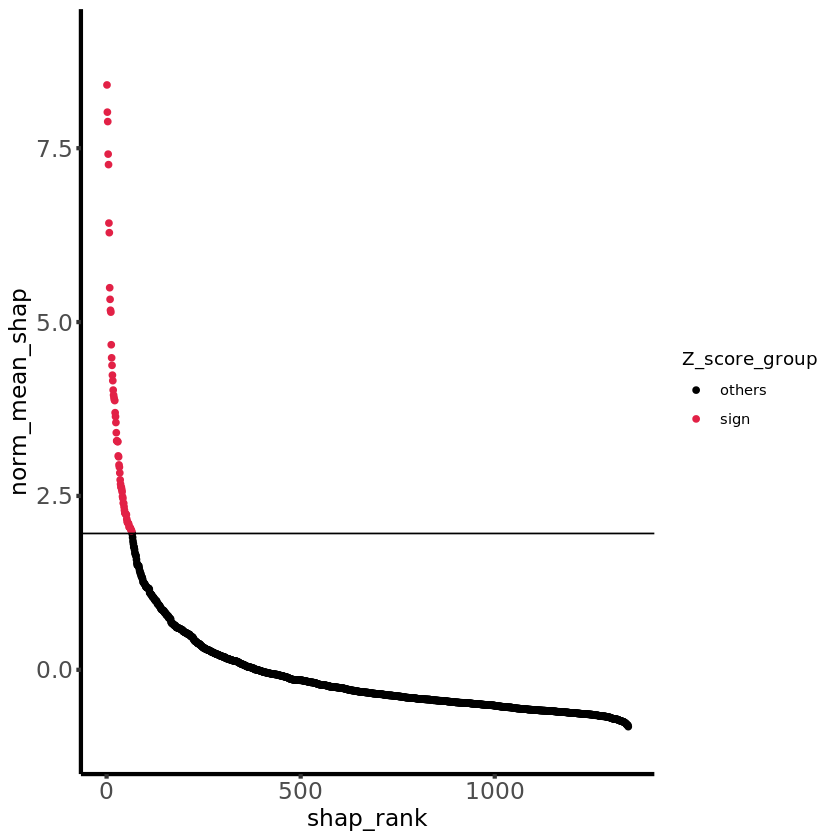

In [7]:
p_point <- ggplot(data=lncRNA_kmer_importance)+
geom_point(aes(x=shap_rank,y=norm_mean_shap,color=Z_score_group))+
ylim(-1,9)+
geom_hline(yintercept = 1.96)+
scale_color_manual(values=c("black","#E22146"))+
theme_classic()+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
      element_line(size = 1.2))
ggsave("./02_SHAP_kmer_Zscore_Output/lncRNA_kmer_Zscore_mean_shap_with_text.pdf", p_point, width = 10, height = 10) 

p_point

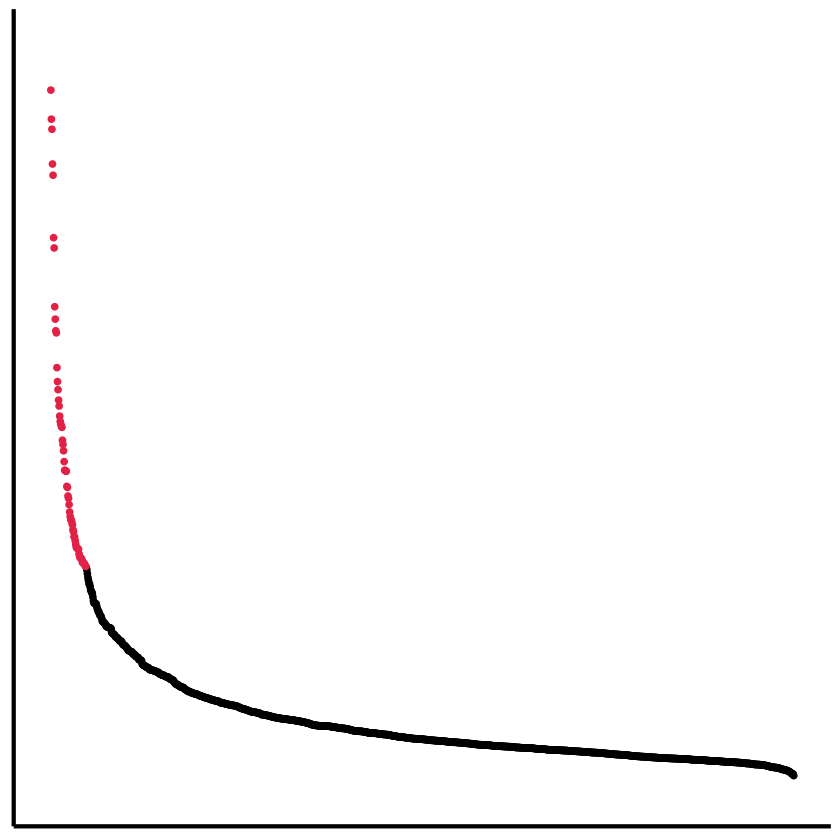

In [13]:
p_point2 <-  ggplot(data=lncRNA_kmer_importance)+
geom_point(aes(x=shap_rank,y=norm_mean_shap,color=Z_score_group))+
ylim(-1,9)+
scale_color_manual(values=c("black","#E22146"))+
theme_classic()+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
      element_line(size = 1.2))+ 
theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./02_SHAP_kmer_Zscore_Output/lncRNA_kmer_Zscore_mean_shap.pdf", p_point2, width = 10, height = 10) 

p_point2

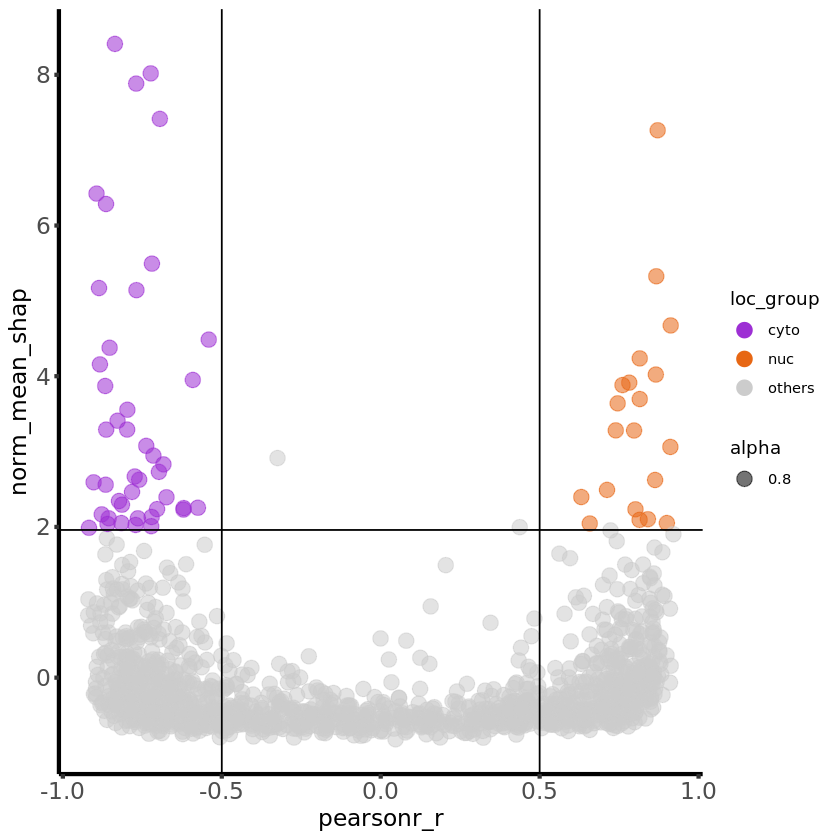

In [9]:
p_point <- ggplot(lncRNA_kmer_importance,aes(x=norm_mean_shap,y=pearsonr_r,color = loc_group,alpha = 0.8))+
geom_point(size = 4)+
geom_vline(xintercept = 1.96)+
geom_hline(yintercept =  c(-0.5,0.5))+
scale_color_manual(values=c("#9D2FD4","#E76714","gray80"))+
theme_classic()+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
      element_line(size = 1.2))+ 
coord_flip()
ggsave("./02_SHAP_kmer_Zscore_Output/lncRNA_kmer_Zscore_volcano_plot_with_text.pdf", p_point, width = 10, height = 10) 

p_point 

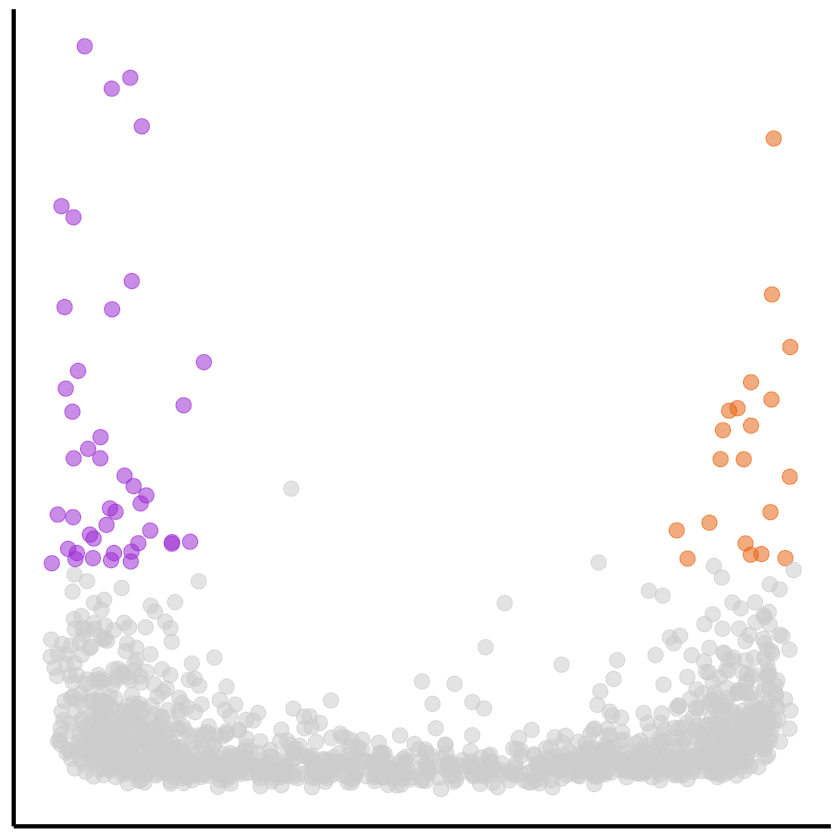

In [12]:
p_point2 <- ggplot(lncRNA_kmer_importance,aes(x=norm_mean_shap,y=pearsonr_r,color = loc_group,alpha = 0.8))+
geom_point(size =4 )+
scale_color_manual(values=c("#9D2FD4","#E76714","gray80"))+
theme_classic()+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
      element_line(size = 1.2))+ 
theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")+
coord_flip()

ggsave("./02_SHAP_kmer_Zscore_Output/lncRNA_kmer_Zscore_volcano_plot.pdf", p_point2, width = 10, height = 10) 

p_point2

In [11]:
nrow(lncRNA_kmer_importance[lncRNA_kmer_importance$norm_mean_shap > 1.96 & lncRNA_kmer_importance$pearsonr_r>0.5,])
nrow(lncRNA_kmer_importance[lncRNA_kmer_importance$norm_mean_shap > 1.96 & lncRNA_kmer_importance$pearsonr_r< -0.5,])

[1] 20

[1] 43

In [14]:
write.table(lncRNA_kmer_importance,"./02_SHAP_kmer_Zscore_Output/lncRNA_kmer_importance_group.txt",sep = '\t',quote =F,row.names=F)